# Задание к занятию «Построение марковских моделей для временных рядов»

Описание задания:

- Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

- Выберите ряд  и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.


In [84]:
import glob
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [138]:
text = ""
for filename in glob.glob("./*.txt"):
    f = open(filename, 'r', encoding='utf8')
    text += (f.read())
    f.close()
print(len(text))

2993415


In [139]:
text[1000:2000]

'есмотря на ухабы дороги, не просыпался, лежа на дне перекладных саней, подле Ростова, который, по мере приближения к Москве, приходил все более и более в нетерпение.\n\n«Скоро ли? Скоро ли? О, эти несносные улицы, лавки, калачи, фонари, извозчики!» думал Ростов, когда уже они записали свои отпуски на заставе и въехали в Москву.\n\n– Денисов, приехали! Спит! – говорил он, всем телом подаваясь вперед, как будто он этим положением надеялся ускорить движение саней. Денисов не откликался.\n\n– Вот он угол-перекресток, где Захар извозчик стоит; вот он и Захар, и всё та же лошадь. Вот и лавочка, где пряники покупали. Скоро ли? Ну!\n\n– К какому дому-то? – спросил ямщик.\n\n– Да вон на конце, к большому, как ты не видишь! Это наш дом, – говорил Ростов, – ведь это наш дом! Денисов! Денисов! Сейчас приедем.\n\nДенисов поднял голову, откашлялся и ничего не ответил.\n\n– Дмитрий, – обратился Ростов к лакею на облучке. – Ведь это у нас огонь?\n\n– Так точно-с и у папеньки в кабинете светится.\n\n–

In [140]:
text = re.sub('[^а-яА-Я ]','', text)

In [141]:
text[1000:2000]

'ики покупали Скоро ли Ну К какому домуто  спросил ямщик Да вон на конце к большому как ты не видишь Это наш дом  говорил Ростов  ведь это наш дом Денисов Денисов Сейчас приедемДенисов поднял голову откашлялся и ничего не ответил Дмитрий  обратился Ростов к лакею на облучке  Ведь это у нас огонь Так точнос и у папеньки в кабинете светится Еще не ложились А как ты думаешь Смотри же не забудь тотчас достань мне новую венгерку  прибавил Ростов ощупывая новые усы  Ну же пошел  кричал он ямщику  Да проснись же Вася  обращался он к Денисову который опять опустил голову  Да ну же пошел три целковых на водку пошел  закричал Ростов когда уже сани были за три дома от подъезда Ему казалось что лошади не двигаются Наконец сани взяли вправо к подъезду над головой своей Ростов увидал знакомый карниз с отбитой штукатуркой крыльцо тротуарный столб Он на ходу выскочил из саней и побежал в сени Дом также стоял неподвижно нерадушно как будто ему дела не было до того кто приехал в него В сенях никого не б

In [142]:
text = re.sub(' +',' ', text)

In [143]:
text[1000:2000]

'окупали Скоро ли Ну К какому домуто спросил ямщик Да вон на конце к большому как ты не видишь Это наш дом говорил Ростов ведь это наш дом Денисов Денисов Сейчас приедемДенисов поднял голову откашлялся и ничего не ответил Дмитрий обратился Ростов к лакею на облучке Ведь это у нас огонь Так точнос и у папеньки в кабинете светится Еще не ложились А как ты думаешь Смотри же не забудь тотчас достань мне новую венгерку прибавил Ростов ощупывая новые усы Ну же пошел кричал он ямщику Да проснись же Вася обращался он к Денисову который опять опустил голову Да ну же пошел три целковых на водку пошел закричал Ростов когда уже сани были за три дома от подъезда Ему казалось что лошади не двигаются Наконец сани взяли вправо к подъезду над головой своей Ростов увидал знакомый карниз с отбитой штукатуркой крыльцо тротуарный столб Он на ходу выскочил из саней и побежал в сени Дом также стоял неподвижно нерадушно как будто ему дела не было до того кто приехал в него В сенях никого не было Боже мой все 

## матрица переходных вероятностей

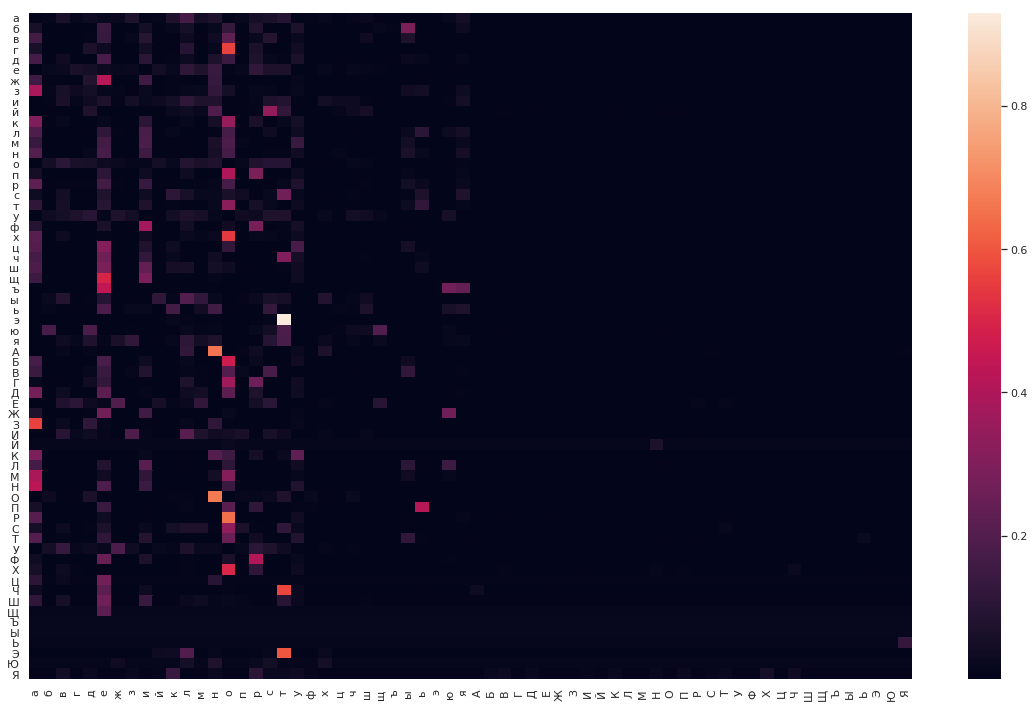

In [166]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
RUSSIAN += RUSSIAN.upper()
POS = {l: i for i, l in enumerate(RUSSIAN)}

probabilities = np.ones((len(RUSSIAN), len(RUSSIAN)))

for cp, cn in zip(text[:-1], text[1:]):
    if (cp!=' ') and (cn!=' '):
        probabilities[POS[cp], POS[cn]] += 1

probabilities = (probabilities / probabilities.sum(axis=1)[:, None])
    

df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

plt.figure(figsize=(16,10))
sns.heatmap(df, xticklabels=True, yticklabels=True)
plt.tight_layout()
plt.show()

In [167]:
df.head()

,а,б,в,г,д,е,ж,з,и,й,...,Ц,Ч,Ш,Щ,Ъ,Ы,Ь,Э,Ю,Я
а,0.000156,0.011540,0.062077,0.015896,0.036020,0.018248,0.022398,0.075898,0.002245,0.012180,...,0.000014,0.000107,0.000036,0.000007,0.000007,0.000007,0.000007,0.000050,0.000007,0.000043
б,0.059204,0.000674,0.005826,0.000755,0.001618,0.141308,0.000539,0.000081,0.050249,0.000027,...,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027
в,0.166518,0.000371,0.000964,0.001126,0.008962,0.132898,0.000035,0.015045,0.094612,0.000012,...,0.000023,0.000070,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000023,0.000012
г,0.059897,0.000024,0.002393,0.000095,0.065844,0.029854,0.000071,0.000095,0.046036,0.000024,...,0.000024,0.000071,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024
д,0.167532,0.001356,0.038836,0.000293,0.001140,0.176039,0.000601,0.000123,0.103392,0.000031,...,0.000015,0.000046,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015


## вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р

In [168]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
proba_sum = 0.
for c1 in RUSSIAN:
    for c2 in RUSSIAN:
        proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end]
        proba_sum += proba
        if proba > 0:
            print(''.join(['п', c1, c2, 'р']), proba)

паар 6.896716665223072e-09
пабр 7.460765135736814e-07
павр 9.816748722353417e-07
пагр 8.73057903078173e-07
падр 2.1309272674752724e-06
паер 1.8058732761644188e-06
пажр 6.057692709811351e-09
пазр 9.415792412974072e-07
паир 2.4051491714333506e-08
пайр 8.155957649814931e-08
пакр 4.0606624121251215e-06
палр 1.4149340135458535e-09
памр 1.0577853280032928e-07
панр 7.379558088682063e-08
паор 8.533753314796466e-09
папр 4.0308430015431845e-06
парр 1.9624537010731084e-08
паср 3.776673546325601e-07
патр 4.281332757229677e-06
паур 4.798767684015824e-08
пафр 2.32576642202764e-06
пахр 2.5529409720253245e-07
пацр 1.3572314822636915e-10
пачр 1.825596968254071e-08
пашр 4.71728493207506e-09
пащр 3.732714457915597e-09
паър 5.450451908419176e-12
паыр 1.3702014424846935e-10
паьр 3.129802962520099e-13
паэр 8.225338310004068e-11
паюр 2.494281122623817e-07
паяр 2.0503377904701708e-07
паАр 3.0853418155449395e-09
паБр 3.1382074755387982e-09
паВр 2.567243529896971e-09
паГр 3.485912744642097e-08
паДр 1.5891805826

ппрр 4.043625153461524e-09
ппср 5.4346787897912954e-11
пптр 3.759599144194383e-09
ппур 3.154451459435677e-08
ппфр 4.801982776797498e-10
ппхр 1.0461188306126464e-11
ппцр 2.556164085102385e-12
ппчр 1.947836313275166e-10
ппшр 1.7378003282647594e-12
ппщр 3.44329898222196e-12
ппър 5.337902775563119e-13
ппыр 9.460447601589555e-09
ппьр 2.881263636343206e-12
ппэр 8.055489147073433e-12
ппюр 1.1904363804116079e-11
ппяр 2.768248881750117e-09
ппАр 1.888519396818115e-11
ппБр 1.3970022932740631e-11
ппВр 5.5257829061503726e-12
ппГр 1.484317553340088e-10
ппДр 4.0956968173517575e-11
ппЕр 2.78734181991656e-11
ппЖр 1.879013426699903e-12
ппЗр 2.2220079410975044e-12
ппИр 1.2769578133559205e-12
ппЙр 8.115159437051757e-12
ппКр 5.841411987374106e-11
ппЛр 9.33243335260952e-13
ппМр 3.745458201716195e-13
ппНр 1.5115802292061983e-12
ппОр 7.520259668582937e-12
ппПр 1.940513673626931e-10
ппРр 5.950541988911489e-13
ппСр 8.883625204268853e-12
ппТр 2.350081146432168e-11
ппУр 5.8018501324656775e-11
ппФр 2.2817799547130

пюШр 1.644936944355763e-13
пюЩр 5.483123147852542e-13
пюЪр 6.939577734000874e-13
пюЫр 6.939577734000874e-13
пюЬр 6.16851354133411e-13
пюЭр 1.3519267558459425e-12
пюЮр 1.0966246295705084e-12
пюЯр 9.437825718241189e-12
пяар 1.911161736907792e-09
пябр 9.615924659989793e-08
пявр 1.760621134499861e-07
пягр 2.863127902402761e-07
пядр 1.4258017903108252e-06
пяер 3.9727709936254676e-07
пяжр 5.338829214453466e-09
пязр 4.6595266056424615e-07
пяир 6.8055635639778904e-09
пяйр 9.669869831758603e-09
пякр 2.5300252599591466e-07
пялр 2.912022896681067e-10
пямр 2.8670717980669307e-08
пянр 2.2775673881902898e-08
пяор 9.634386460303922e-10
пяпр 2.24698761731657e-07
пярр 6.202188053597358e-10
пяср 1.5981069829530477e-07
пятр 2.5851471463722957e-06
пяур 3.7944871443272003e-10
пяфр 3.3213732197773622e-09
пяхр 1.1331042251708279e-07
пяцр 1.6366762336346036e-10
пячр 6.600309468066064e-09
пяшр 1.1927332175503497e-10
пящр 6.8471472059796024e-09
пяър 1.1076154259150254e-11
пяыр 2.7844594903457094e-10
пяьр 6.3602

пОАр 2.6613837345961746e-12
пОБр 1.968716438272954e-12
пОВр 3.8935868946106865e-13
пОГр 6.27529470985152e-11
пОДр 5.771834226274086e-12
пОЕр 3.928043415801932e-12
пОЖр 2.647987507744181e-13
пОЗр 3.1313503067768485e-13
пОИр 1.7995445320587591e-13
пОЙр 5.718117951505549e-12
пОКр 4.115986014352235e-12
пОЛр 1.3151671288462765e-13
пОМр 5.278262724466661e-14
пОНр 5.3254616319066363e-14
пООр 1.059787725539249e-12
пОПр 9.11552110867654e-12
пОРр 3.773593249612058e-13
пОСр 6.259595655391301e-13
пОТр 3.3118366423101536e-12
пОУр 8.176219740779261e-12
пОФр 3.215583630029146e-11
пОХр 9.344608547065648e-12
пОЦр 6.575835644231382e-13
пОЧр 2.534583331823659e-13
пОШр 2.9225936196583923e-13
пОЩр 9.74197873219464e-13
пОЪр 1.2329691832933842e-12
пОЫр 1.2329691832933842e-12
пОЬр 1.095972607371897e-12
пОЭр 8.006654448444073e-13
пОЮр 1.948395746438928e-12
пОЯр 8.384190446395013e-12
пПар 2.6436835459406802e-09
пПбр 1.3088666352790188e-11
пПвр 3.201497024935864e-12
пПгр 5.559620166953933e-11
пПдр 1.197689904473

пЮир 4.6349884864353286e-11
пЮйр 2.8977296828164673e-11
пЮкр 2.2233494111220793e-10
пЮлр 1.4647650735210462e-13
пЮмр 8.652200239134413e-12
пЮнр 2.598385083277096e-11
пЮор 2.8870965284411167e-10
пЮпр 1.0202203572138917e-09
пЮрр 3.0976398396961395e-12
пЮср 9.655203110174992e-11
пЮтр 2.0152973352858216e-10
пЮур 1.1370781841416734e-10
пЮфр 9.95302101694395e-10
пЮхр 2.60193587306094e-10
пЮцр 4.5412589003343733e-13
пЮчр 5.555863181477569e-12
пЮшр 8.312125665790596e-13
пЮщр 3.5684454454179433e-12
пЮър 3.319145089500824e-12
пЮыр 8.344073970132629e-11
пЮьр 1.905946572633219e-13
пЮэр 1.669653068519676e-11
пЮюр 7.402216249600932e-11
пЮяр 1.94939571626167e-11
пЮАр 1.174294502153917e-10
пЮБр 8.686657469614243e-11
пЮВр 1.717985131029456e-11
пЮГр 9.229589832514129e-10
пЮДр 2.5467327808276025e-10
пЮЕр 1.733188539268655e-10
пЮЖр 1.1683836237873707e-11
пЮЗр 1.3816599995580811e-11
пЮИр 7.94021254021976e-12
пЮЙр 5.0460626070816876e-11
пЮКр 1.8161153105302333e-10
пЮЛр 5.802971998143941e-12
пЮМр 2.328951972

In [169]:
proba_sum

0.0006258734868109506

## генерация слова  с буквы "Б" длинной  8 символов

In [170]:
s = []
start = 'Б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

Бойскужен
